In [1]:
import json
import pandas as pd 
import matplotlib as mpl
import powerlaw
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import networkx as nx
%matplotlib inline

In [2]:
# Read in dataset of user information
Yelp_Users = pd.read_json('YelpDataset/user.json',lines=True)

In [3]:
Yelp_Reviews = pd.read_csv('HOPEFUL.csv')

In [4]:
len(Yelp_Reviews)

5253484

In [5]:
Yelp_Users['num_of_friends'] = Yelp_Users['friends'].apply(len)

## Goal: Want to see if we can say that writing more reviews corresponds to an affinity for similar items.

## Method: Get distribution of review count to see how many reviews people usually write, then compute diversity metric for each user.

### Conjecture: If people review similar items and review frequently, they will like similar items.

In [10]:
# Group the User data frame by the review count of a user

Review_CountDF = Yelp_Reviews.groupby("user_num_reviews")

In [7]:
Review_CountDF2 = Yelp_Reviews.groupby('business_num_reviews')

In [11]:
Num_FriendsDF = Yelp_Users.groupby("num_of_friends")

/home/jbowllan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


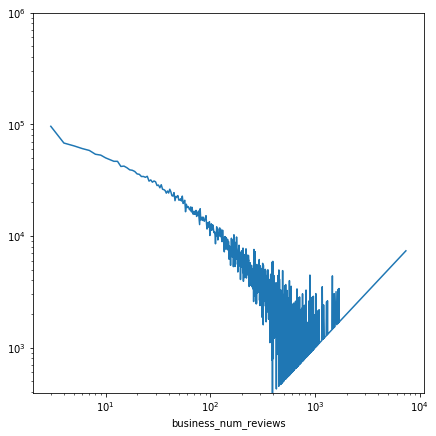

In [30]:
# A better look at the plot above 
# Beta distribution if you cut the permissible review counts at some threshold value

fig,ax = plt.subplots(figsize =(7,7))
Review_CountDF2.count()['date'].plot()
ax.set_xbound(lower=0.0, upper=20)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,1000000)
plt.show()

In [70]:
numReviewsFreqList = list(Review_CountDF.count()['average_stars'])

In [71]:
def fitCompare(myFit):
    print ('power_law Vs exponential: ', myFit.distribution_compare('power_law', 'exponential'))
    print ('power_law Vs truncated_power_law:  ', myFit.distribution_compare('power_law', 'truncated_power_law'))
    print ('power_law Vs stretched_exponential:  ', myFit.distribution_compare('power_law', 'stretched_exponential'))
    print ('truncated_power_law Vs exponential:  ', myFit.distribution_compare('truncated_power_law', 'exponential' ))
    print ('truncated_power_law Vs stretched_exponential:  ', myFit.distribution_compare('truncated_power_law', 'stretched_exponential'))
    print ('exponential Vs stretched_exponential:  ', myFit.distribution_compare('exponential', 'stretched_exponential'))

In [72]:
fit1 = powerlaw.Fit(numReviewsFreqList, discrete=False)
fitCompare(fit1)

Calculating best minimal value for power law fit
/home/jbowllan/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power_law Vs exponential:  (207.07923996779257, 1.2320774031342845e-08)


Assuming nested distributions


power_law Vs truncated_power_law:   (-2.064463556649363, 0.04215606950290296)
power_law Vs stretched_exponential:   (-0.8730530850051634, 0.5385938722890012)
truncated_power_law Vs exponential:   (209.14370352444197, 4.221907147387884e-09)
truncated_power_law Vs stretched_exponential:   (1.1914104716441996, 0.08414806487738692)
exponential Vs stretched_exponential:   (-207.95229305279784, 0.0)


Assuming nested distributions


In [73]:
fit1.alpha

1.6025860683104134

/home/jbowllan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/home/jbowllan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


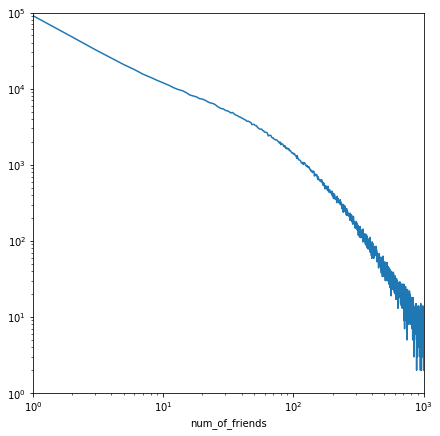

In [20]:
fig,ax = plt.subplots(figsize =(7,7))
Num_FriendsDF.count()['average_stars'].plot()
ax.set_xbound(lower=0.0, upper=1000)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,1000)
plt.ylim(0,100000)
ax.yaxis
plt.show()

/home/jbowllan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


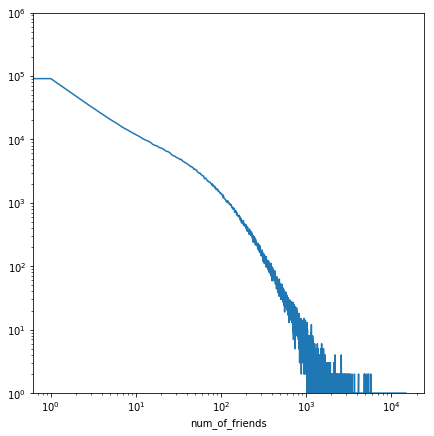

In [75]:
fig,ax = plt.subplots(figsize =(7,7))
Num_FriendsDF.count()['average_stars'].plot()
ax.set_xbound(lower=0.0, upper=20)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,1000000)
plt.show()

/home/jbowllan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


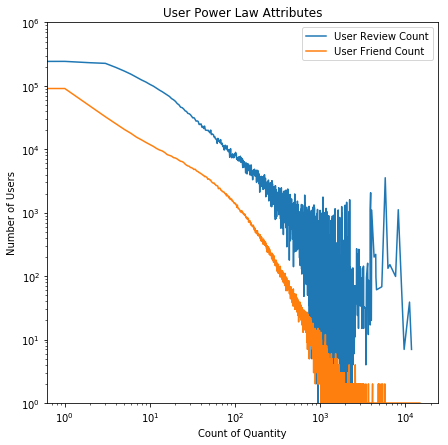

In [32]:
# A better look at the plot above 
# Beta distribution if you cut the permissible review counts at some threshold value

fig,ax = plt.subplots(figsize =(7,7))
Review_CountDF.count()['date'].plot()
Num_FriendsDF.count()['average_stars'].plot()
ax.set_xbound(lower=0.0, upper=200)
legend = ['User Review Count','User Friend Count']
plt.legend(legend)
plt.xlabel("Count of Quantity")
plt.ylabel("Number of Users")
plt.xscale('log')
plt.yscale('log')
plt.title("User Power Law Attributes")
plt.ylim(0,1000000)
plt.savefig("TechReportFigures/User_Powerlaw/userPowerlaw.png")
plt.savefig("TechReportFigures/User_Powerlaw/userPowerlaw.svg")
plt.savefig("TechReportFigures/User_Powerlaw/userPowerlaw.jpg")

plt.show()

In [76]:
numFriendsFreqList = list(Num_FriendsDF.count()['average_stars'])

In [77]:
fit2 = powerlaw.Fit(numFriendsFreqList, discrete=False)
fitCompare(fit2)

Calculating best minimal value for power law fit
/home/jbowllan/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power_law Vs exponential:  (47.302948779150285, 0.023395813613591675)
power_law Vs truncated_power_law:   (1.1975318869872353e-07, 0.9996095201883752)
power_law Vs stretched_exponential:   (0.7427825138108499, 0.3503271665855827)
truncated_power_law Vs exponential:   (47.30294865939709, 0.023395913335885483)
truncated_power_law Vs stretched_exponential:   (0.7427823940576612, 0.35033092940967203)
exponential Vs stretched_exponential:   (-46.56016626533944, 0.0)


Assuming nested distributions
Assuming nested distributions


In [78]:
fit2.alpha

2.1906384455380907

In [79]:
def frequencyInPowerRange(base,powerlim,listOfValues):
    # calculating the frequncies in between
    # 0 < base^0, 
    # base^0 <= x < base^1, 
    # base^1 <= x < base^2, 
    # base^2 <= x < base^3... 
    # base^powerlim < x
    
    # Motivation: want to categorize user features 
    
    lenList = len(listOfValues)
    maxNum = base**powerlim
    if lenList < maxNum:
        return 
    locList = []
    locList.append(listOfValues[0])  # num of instances that have 0 
    for i in range(powerlim):
        locSum = 0
        startVal = base**i
        endVal = base**(i+1)
        for frequency in listOfValues[startVal:endVal]:
            locSum+=frequency
        locList.append(locSum)
    lastIndex = base**powerlim
    lastSum = 0
    for frequency in listOfValues[lastIndex:]:
        lastSum += frequency
    locList.append(lastSum)
    return locList       
        
        

In [84]:
revCountSepExp = frequencyInPowerRange(2,6,numReviewsFreqList)
numFriendsSepExp = frequencyInPowerRange(2,6,numFriendsFreqList)
npRevCountSepExp = np.array(revCountSepExp)
npNumFriendsSepExp = np.array(numFriendsSepExp)

Text(0.5,1,'Review Count Exponential Categorization')

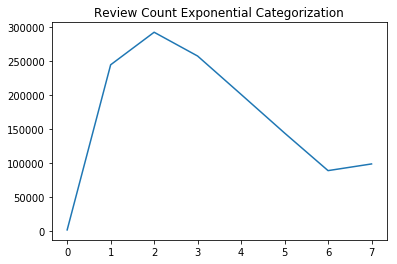

In [85]:
plt.plot(npRevCountSepExp)
plt.title("Review Count Exponential Categorization")

Text(0.5,1,'Number of Friends Exponential Categorization')

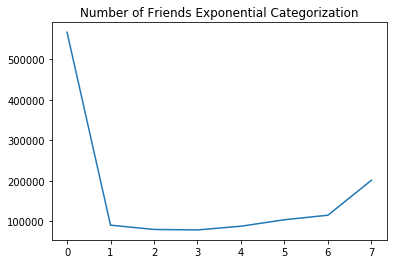

In [86]:
plt.plot(npNumFriendsSepExp)
plt.title("Number of Friends Exponential Categorization")

## Now let us see the average review count (a cumulative distribution perspective):

In [38]:
for i in range(6):
    threshold = int(str(i)+"0")
    meanReviewCount = Yelp_Users[Yelp_Users['review_count']<=threshold]['review_count'].mean()
    print("Average number of reviews written for all users with less than or" \
    " equal to "+ str(threshold)+ " reviews: "+ str(meanReviewCount))


Average number of reviews written for all users with less than or equal to 0 reviews: 0.0
Average number of reviews written for all users with less than or equal to 10 reviews: 3.5485360352793887
Average number of reviews written for all users with less than or equal to 20 reviews: 5.3050996723682085
Average number of reviews written for all users with less than or equal to 30 reviews: 6.596593950778972
Average number of reviews written for all users with less than or equal to 40 reviews: 7.62552322240395
Average number of reviews written for all users with less than or equal to 50 reviews: 8.47859574673129


## Now let us see what percentage of users write at most a certain amount of reviews

In [7]:
Review_CountDF

In [33]:
# Review_CountDF2.count()['business_id'][Review_CountDF2.count()['business_id'].index <= 20]
Review_CountDF2.count()['business_id']

business_num_reviews
3       95917
4       67921
5       64038
6       60568
7       58293
8       53907
9       52928
10      50031
11      48195
12      46609
13      46588
14      41933
15      42209
16      40796
17      39089
18      38734
19      37786
20      35946
21      35634
22      34058
23      34095
24      33505
25      34231
26      30974
27      31759
28      30295
29      31066
30      30559
31      28282
32      28557
        ...  
2681     2682
2687     2688
2703     2700
2771     2771
2780     2781
2884     2884
2935     2933
2938     2942
3012     3011
3050     3051
3065     3064
3101     3103
3262     3264
3284     3287
3444     3445
3570     3571
3621     3623
3741     3741
3772     3772
3794     3794
3838     3836
3910     3911
3964     3965
4018     4018
4774     4774
4869     4870
5447     5448
5950     5951
7009     7006
7361     7362
Name: business_id, Length: 1061, dtype: int64

In [30]:
# see what percentage of people write # of reviews
denominator = Review_CountDF.count()['business_id'].sum()
denominator2 = Review_CountDF2.count()['business_id'].sum()
RevCountDF = Review_CountDF.count()['business_id']
RevCountDF2 = Review_CountDF2.count()['business_id']
for i in range(60):
    numerator = RevCountDF[RevCountDF.index <= i].sum()
    numerator2 = RevCountDF2[RevCountDF2.index <= i].sum()
    fracUsersNumRev = numerator/denominator
    fracBusNumRev = numerator2/denominator2
    percentUsersNumRev = fracUsersNumRev*100
    percentBusNumRev = fracBusNumRev*100
    print(str(percentUsersNumRev)+"% of users write at most "+str(i)+" reviews!")
    print(str(percentBusNumRev)+"% of businesses have at most "+str(i)+" reviews!")

0.13491998833535992% of users write at most 0 reviews!
0.0% of businesses have at most 0 reviews!
4.7712717883979465% of users write at most 1 reviews!
0.0% of businesses have at most 1 reviews!
9.184876169795132% of users write at most 2 reviews!
0.0% of businesses have at most 2 reviews!
13.501002382418982% of users write at most 3 reviews!
1.8257788545658464% of businesses have at most 3 reviews!
17.215204233990246% of users write at most 4 reviews!
3.118654211186329% of businesses have at most 4 reviews!
20.48084661531281% of users write at most 5 reviews!
4.3376167130232055% of businesses have at most 5 reviews!
23.391752977643026% of users write at most 6 reviews!
5.490527809735406% of businesses have at most 6 reviews!
25.996043768287862% of users write at most 7 reviews!
6.600134310868749% of businesses have at most 7 reviews!
28.35493550565682% of users write at most 8 reviews!
7.626253358723469% of businesses have at most 8 reviews!
30.543121479003265% of users write at most 

In [27]:
RevCountDF[RevCountDF.index <= 15].sum(),Review_CountDF.count()['business_id'].sum()

(2144219, 5253484)

In [28]:
2144219/5253484

0.40815180935166073

In [5]:
Yelp_Users.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since,num_of_friends
0,4.67,0,0,0,0,0,0,0,0,1,...,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03,11
1,3.70,0,0,0,0,0,0,0,0,0,...,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24,79
2,2.00,0,0,0,0,0,0,0,0,0,...,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02,0
3,4.67,0,0,0,0,0,0,0,0,0,...,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13,0
4,4.67,0,0,0,0,0,0,0,0,0,...,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08,0


In [62]:
def categoryOfReviewOrFriendsCount(base, numGroups, count):
    if count == 0:
        return 0
    elif count >= base ** numGroups:
        return numGroups + 1
    else:
        for i in range(numGroups):
            if (count >= base**i) and (count < base**(i+1)):
                return i + 1

In [34]:
3+4

7

In [41]:
BusAv = Yelp_Reviews.groupby('business_id').agg('mean')

In [42]:
BusAv 

,Unnamed: 0,Unnamed: 0.1,stars,user_average_stars,user_cool,user_funny,user_userful,user_num_reviews,user_num_friends,business_num_reviews,business_average_stars,business_lat,business_long,lv1Cat_Av,lv2Cat_Av,zipCodeBusiness_Av,zipCodeUser_Av,zipCodeUser_WeightedAv,zipCodeUserCount
business_id,,,,,,,,,,,,,,,,,,,
--6MefnULPED_I942VcFNA,2.867429e+06,2.867429e+06,3.135135,3.466216,452.459459,371.405405,495.891892,326.378378,216.594595,37.0,3.0,43.840905,-79.399604,3.683764,3.731733,3.220670,3.319878,3.491323,164.0
--7zmmkVg-IMGaXbuVd0SQ,2.655820e+06,2.655820e+06,3.851064,3.857660,192.127660,126.021277,328.680851,212.893617,124.702128,47.0,4.0,35.437086,-80.843688,3.605285,3.677544,3.743000,3.726209,3.769480,6119.0
--8LPVSo5i0Oo61X01sV9A,1.590402e+06,1.590402e+06,4.333333,4.216667,0.000000,0.000000,0.000000,7.666667,17.666667,3.0,4.5,33.379509,-111.728394,3.561362,3.925511,3.947269,3.830802,3.791596,18564.0
--9QQLMTbFzLJ_oT-ON3Xw,2.441206e+06,2.441206e+06,3.363636,3.053636,83.818182,37.272727,82.363636,33.636364,47.818182,11.0,3.5,33.361664,-111.909623,4.007027,3.925511,3.794803,3.774957,3.780329,15728.0
--9e1ONYQuAa-CB_Rrw7Tw,2.571523e+06,2.571523e+06,4.088904,3.732784,388.390765,289.403170,452.793935,180.514128,173.190903,1451.0,4.0,36.123183,-115.169190,3.729597,3.805234,3.616599,3.679530,3.752478,224902.0
--DaPTJW3-tB1vP-PfdTEg,2.830821e+06,2.830821e+06,3.666667,3.280000,55.666667,32.948718,123.076923,100.461538,99.615385,39.0,3.5,43.677807,-79.444674,3.719693,3.677544,3.504695,3.504365,3.500181,197.0
--DdmeR16TRb3LsjG0ejrQ,2.064155e+06,2.064155e+06,3.200000,3.738000,843.000000,358.200000,1067.400000,504.200000,479.400000,5.0,3.0,36.114277,-115.170975,3.605285,3.677544,3.616599,3.679530,3.752478,224902.0
--EF5N7P70J_UYBTPypYlA,1.629494e+06,1.629494e+06,3.000000,3.120000,0.000000,0.000000,0.333333,3.333333,4.333333,3.0,3.0,41.428611,-81.889223,4.007027,3.925511,3.514161,3.586766,3.751627,3445.0
--EX4rRznJrltyn-34Jz1w,3.436288e+06,3.436288e+06,4.000000,3.767500,162.000000,171.250000,247.000000,248.000000,220.250000,4.0,4.0,35.352128,-80.851235,4.007027,3.677544,3.276934,3.503249,3.701905,2958.0


In [43]:
def roundtoTenthsPlace(double):
    stringOfDouble = str(double)
    onesVal = int(stringOfDouble[0:1])
    decimalVal = float(str(0) + stringOfDouble[1:])
    if (decimalVal >= .25) and (decimalVal < .75):
        return float(onesVal+0.5)
    elif decimalVal < .25:
        return float(onesVal)
    elif decimalVal >= .75:
        return float(onesVal+1)

In [44]:
BusAv['roundedAvStars'] = BusAv['stars'].apply(roundtoTenthsPlace)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

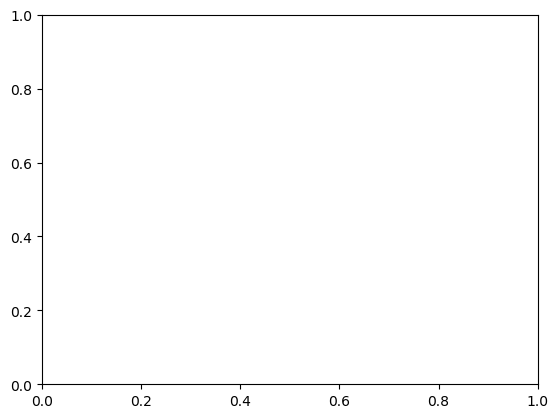

In [45]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('1.0', '1.5', '2.0', '2.5', '3.0', '3.5','4.0','4.5','5.0')
y_pos = np.arange(len(objects))
performance = list(BusAv['roundedAvStars'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of businesses')
plt.title('Distribution of average rating of businesses')
 
plt.show()

In [56]:
busAvdf = Yelp_Reviews.groupby('business_id').agg('mean')[['stars','business_average_stars']]

In [60]:
busAvdf.head(10)

,stars,business_average_stars
business_id,,
--6MefnULPED_I942VcFNA,3.135135,3.0
--7zmmkVg-IMGaXbuVd0SQ,3.851064,4.0
--8LPVSo5i0Oo61X01sV9A,4.333333,4.5
--9QQLMTbFzLJ_oT-ON3Xw,3.363636,3.5
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,4.0
--DaPTJW3-tB1vP-PfdTEg,3.666667,3.5
--DdmeR16TRb3LsjG0ejrQ,3.200000,3.0
--EF5N7P70J_UYBTPypYlA,3.000000,3.0
--EX4rRznJrltyn-34Jz1w,4.000000,4.0


In [125]:
busAvdf = busAvdf['stars']


In [137]:
busAvdf = busAvdf.to_frame()

In [138]:
busAvdf.to_csv('businessStarsUnrounded')

In [139]:
pd.read_csv('businessStarsUnrounded')

,business_id,stars
0,--6MefnULPED_I942VcFNA,3.135135
1,--7zmmkVg-IMGaXbuVd0SQ,3.851064
2,--8LPVSo5i0Oo61X01sV9A,4.333333
3,--9QQLMTbFzLJ_oT-ON3Xw,3.363636
4,--9e1ONYQuAa-CB_Rrw7Tw,4.088904
5,--DaPTJW3-tB1vP-PfdTEg,3.666667
6,--DdmeR16TRb3LsjG0ejrQ,3.200000
7,--EF5N7P70J_UYBTPypYlA,3.000000
8,--EX4rRznJrltyn-34Jz1w,4.000000
9,--FBCX-N37CMYDfs790Bnw,3.722222


In [113]:
roundingUserStarsDF = Yelp_Reviews.groupby('user_id').agg('mean')

In [115]:
roundingUserStarsDF.head()

,Unnamed: 0,Unnamed: 0.1,stars,user_average_stars,user_cool,user_funny,user_userful,user_num_reviews,user_num_friends,business_num_reviews,business_average_stars,business_lat,business_long,lv1Cat_Av,lv2Cat_Av,zipCodeBusiness_Av,zipCodeUser_Av,zipCodeUser_WeightedAv,zipCodeUserCount
user_id,,,,,,,,,,,,,,,,,,,
---1lKK3aKOuomHnwAkAow,3.774140e+06,3.774140e+06,4.05042,3.96,9.0,22.0,67.0,246.0,737.0,300.478992,4.008403,36.148453,-115.228787,3.744724,3.745915,3.825088,3.807332,3.773083,36054.218487
---94vtJ_5o_nikEs6hUjg,3.974121e+06,3.974121e+06,5.00000,5.00,0.0,0.0,0.0,2.0,7.0,19.000000,4.500000,33.612122,-111.998175,3.586478,3.321270,3.811705,3.799550,3.780971,22132.000000
---PLwSf5gKdIoVnyRHgBA,4.164882e+06,4.164882e+06,4.00000,4.00,0.0,0.0,1.0,2.0,0.0,273.500000,4.000000,33.617955,-111.949844,3.863360,3.801528,3.854414,3.832685,3.793296,24815.000000
---cu1hq55BP9DWVXXKHZg,7.931390e+05,7.931390e+05,2.00000,3.79,0.0,14.0,34.0,57.0,2.0,188.000000,3.333333,33.538439,-112.057240,3.633187,3.765211,3.607728,3.723294,3.768359,14745.666667
---fhiwiwBYrvqhpXgcWDQ,6.233500e+05,6.233500e+05,1.00000,2.78,1.0,3.0,2.0,8.0,2.0,597.000000,2.000000,36.123843,-115.170220,3.605285,3.677544,3.616599,3.679530,3.752478,224902.000000


In [116]:
roundingUserStarsDF['userRoundedAvRating'] = \
roundingUserStarsDF['user_average_stars'].apply(roundtoTenthsPlace)

In [117]:
roundingUserStarsDF.head()

,Unnamed: 0,Unnamed: 0.1,stars,user_average_stars,user_cool,user_funny,user_userful,user_num_reviews,user_num_friends,business_num_reviews,business_average_stars,business_lat,business_long,lv1Cat_Av,lv2Cat_Av,zipCodeBusiness_Av,zipCodeUser_Av,zipCodeUser_WeightedAv,zipCodeUserCount,userRoundedAvRating
user_id,,,,,,,,,,,,,,,,,,,,
---1lKK3aKOuomHnwAkAow,3.774140e+06,3.774140e+06,4.05042,3.96,9.0,22.0,67.0,246.0,737.0,300.478992,4.008403,36.148453,-115.228787,3.744724,3.745915,3.825088,3.807332,3.773083,36054.218487,4.0
---94vtJ_5o_nikEs6hUjg,3.974121e+06,3.974121e+06,5.00000,5.00,0.0,0.0,0.0,2.0,7.0,19.000000,4.500000,33.612122,-111.998175,3.586478,3.321270,3.811705,3.799550,3.780971,22132.000000,5.0
---PLwSf5gKdIoVnyRHgBA,4.164882e+06,4.164882e+06,4.00000,4.00,0.0,0.0,1.0,2.0,0.0,273.500000,4.000000,33.617955,-111.949844,3.863360,3.801528,3.854414,3.832685,3.793296,24815.000000,4.0
---cu1hq55BP9DWVXXKHZg,7.931390e+05,7.931390e+05,2.00000,3.79,0.0,14.0,34.0,57.0,2.0,188.000000,3.333333,33.538439,-112.057240,3.633187,3.765211,3.607728,3.723294,3.768359,14745.666667,4.0
---fhiwiwBYrvqhpXgcWDQ,6.233500e+05,6.233500e+05,1.00000,2.78,1.0,3.0,2.0,8.0,2.0,597.000000,2.000000,36.123843,-115.170220,3.605285,3.677544,3.616599,3.679530,3.752478,224902.000000,3.0


In [118]:
roundingUserStarsDf = roundingUserStarsDF['userRoundedAvRating']

In [132]:
roundingUserStarsDf = roundingUserStarsDf.to_frame()

In [134]:
roundingUserStarsDf.to_csv("userRoundedRatings.csv")

In [135]:
pd.read_csv('userRoundedRatings.csv')

,user_id,userRoundedAvRating
0,---1lKK3aKOuomHnwAkAow,4.0
1,---94vtJ_5o_nikEs6hUjg,5.0
2,---PLwSf5gKdIoVnyRHgBA,4.0
3,---cu1hq55BP9DWVXXKHZg,4.0
4,---fhiwiwBYrvqhpXgcWDQ,3.0
5,---udAKDsn0yQXmzbWQNSw,4.0
6,--0RtXvcOIE4XbErYca6Rw,4.5
7,--0WZ5gklOfbUIodJuKfaQ,4.0
8,--0kuuLmuYBe3Rmu0Iycww,3.5
9,--0sXNBv6IizZXuV-nl0Aw,5.0
